### Library required

In [107]:
import pandas as pd

In [108]:
import numpy as np

In [109]:
import seaborn as sns

In [110]:
import matplotlib.pyplot as plt

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [114]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### code

In [117]:
df=pd.read_csv("fraudTrain.csv")

In [118]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [119]:
df.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### EDA AND MISSING VALUES AND OUTLIERS

In [120]:
missing_values = df.isnull().sum()

In [121]:
missing_values

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [122]:
basic_stats = df.describe()

In [123]:
basic_stats

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


C:\Users\goura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\goura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


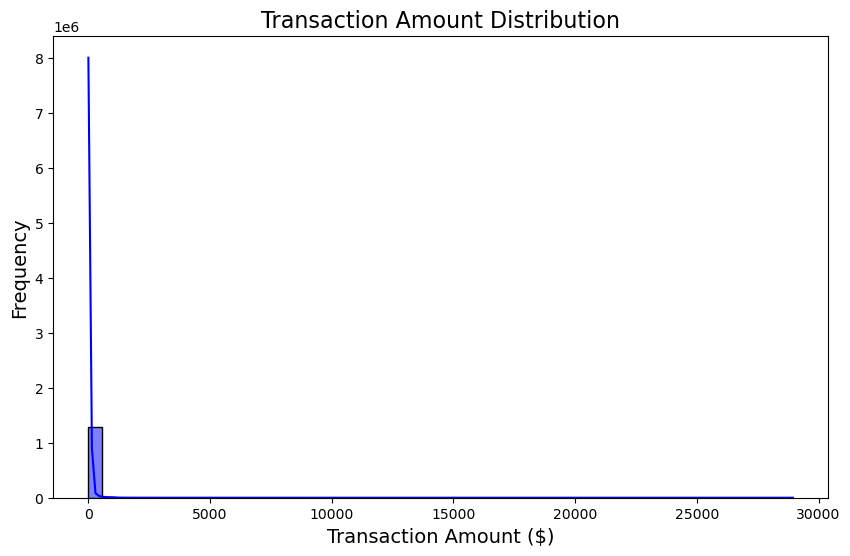

In [124]:
plt.figure(figsize=(10, 6))
sns.histplot(df['amt'], bins=50, kde=True, color='blue')
plt.title('Transaction Amount Distribution', fontsize=16)
plt.xlabel('Transaction Amount ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

C:\Users\goura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\goura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


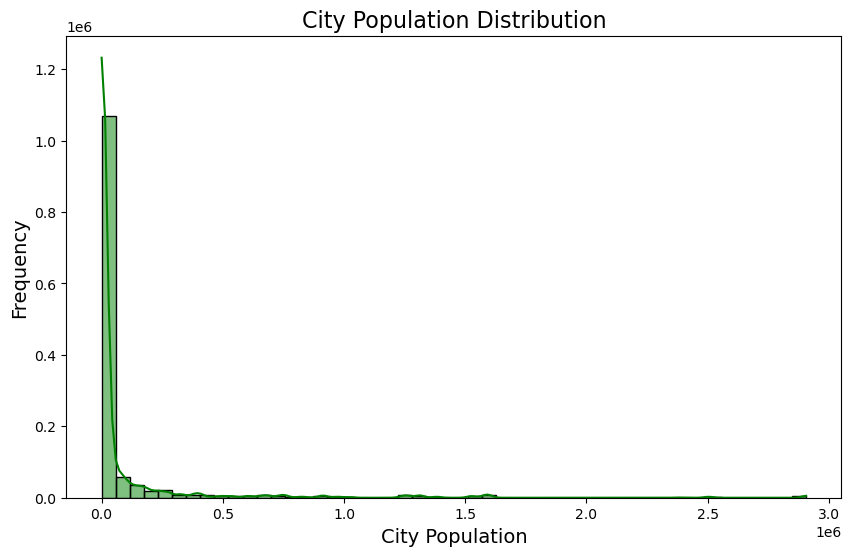

In [125]:
plt.figure(figsize=(10, 6))
sns.histplot(df['city_pop'], bins=50, kde=True, color='green')
plt.title('City Population Distribution', fontsize=16)
plt.xlabel('City Population', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

C:\Users\goura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


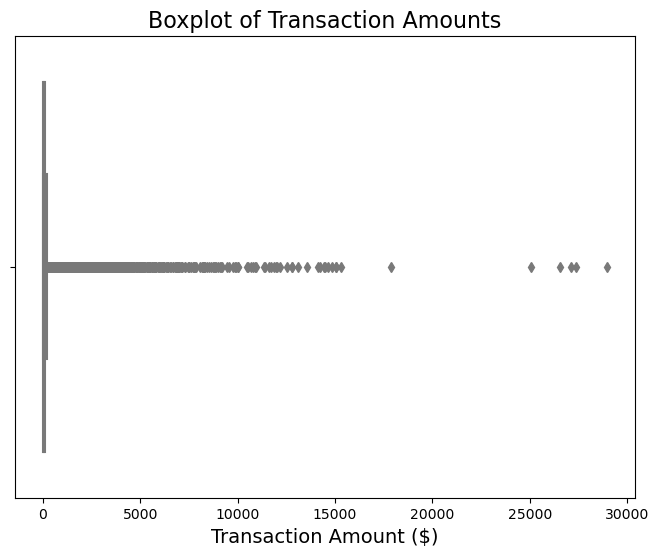

In [126]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='amt', data=df, color='lightblue')
plt.title('Boxplot of Transaction Amounts', fontsize=16)
plt.xlabel('Transaction Amount ($)', fontsize=14)
plt.show()

In [127]:
Q1 = df['amt'].quantile(0.25)
Q3 = df['amt'].quantile(0.75)
IQR = Q3 - Q1

In [128]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [129]:
outliers = df[(df['amt'] < lower_bound) | (df['amt'] > upper_bound)]
outlier_count = outliers.shape[0]

In [130]:
outliers.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0
16,16,2019-01-01 00:10:49,6011860238257910,fraud_Lebsack and Sons,misc_net,327.00,Lisa,Mendez,F,44259 Beth Station Suite 215,...,36.3850,-98.0727,1078,"Programme researcher, broadcasting/film/video",1952-07-06,991c04803b4d4eeab30d6245a872e3d3,1325376649,36.384092,-99.048472,0
17,17,2019-01-01 00:10:58,3565423334076143,fraud_Mayert Group,shopping_pos,341.67,Nathan,Thomas,M,4923 Campbell Pines Suite 717,...,38.9763,-87.3667,4081,Energy engineer,1938-03-15,f12cf52be2175703db789a4644c32f25,1325376658,38.674491,-88.305767,0
36,36,2019-01-01 00:26:22,3598215285024754,fraud_Heidenreich PLC,grocery_pos,207.36,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,f246ac27c09429ff1e385d4683c79c4d,1325377582,40.202538,-73.859212,0


In [131]:
df_cleaned = df[(df['amt'] >= lower_bound) & (df['amt'] <= upper_bound)]

In [132]:
original_shape = df.shape
cleaned_shape = df_cleaned.shape

In [133]:
original_shape

(1296675, 23)

In [134]:
cleaned_shape

(1229385, 23)

In [135]:
df_cleaned.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0


### Drop the unrequired columns

In [136]:
df_cleaned = df_cleaned.drop(['Unnamed: 0', 'first', 'last', 'street','merchant'], axis=1)

In [137]:
df_cleaned = df_cleaned.drop(['trans_date_trans_time'], axis=1)

In [165]:
df_cleaned = df_cleaned.drop(['dob'], axis=1)

In [173]:
df_cleaned = df_cleaned.drop(['trans_num'], axis=1)

In [174]:
df_cleaned.shape

(1229385, 15)

In [175]:
df_cleaned.head()

,cc_num,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,8,4.97,0,522,27,28654,36.0788,-81.1781,3495,369,1325376018,36.011293,-82.048315,0
1,630423337322,4,107.23,0,606,47,99160,48.8878,-118.2105,149,425,1325376044,49.159047,-118.186462,0
3,3534093764340240,2,45.00,1,83,26,59632,46.2306,-112.1138,1939,327,1325376076,47.034331,-112.561071,0
4,375534208663984,9,41.96,1,213,45,24433,38.4207,-79.4629,99,115,1325376186,38.674999,-78.632459,0
5,4767265376804500,2,94.63,0,220,38,18917,40.3750,-75.2045,2158,476,1325376248,40.653382,-76.152667,0


### Feature engineering

In [176]:
label_encoder = LabelEncoder()
df_cleaned['category'] = label_encoder.fit_transform(df_cleaned['category'])
df_cleaned['gender'] = label_encoder.fit_transform(df_cleaned['gender'])
df_cleaned['job'] = label_encoder.fit_transform(df_cleaned['job'])
df_cleaned['city'] = label_encoder.fit_transform(df_cleaned['city'])
df_cleaned['state'] = label_encoder.fit_transform(df_cleaned['state'])

In [177]:
X = df_cleaned.drop('is_fraud', axis=1)
y = df_cleaned['is_fraud']

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [179]:
scaler = StandardScaler()
X_train[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']] = scaler.fit_transform(X_train[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']])
X_test[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']] = scaler.transform(X_test[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']])

### LOGISTIC REGRESSION

In [180]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

### DECISION TREE

In [181]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

### RANDOM FOREST

In [182]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

### ACCURACY

In [186]:
logistic_regression_accuracy = accuracy_score(y_test, y_pred_lr)
decision_tree_accuracy = accuracy_score(y_test, y_pred_dt)
random_forest_accuracy = accuracy_score(y_test, y_pred_rf)

In [187]:
logistic_regression_accuracy

0.998562969068587

In [188]:
decision_tree_accuracy

0.9982294694373346

In [189]:
random_forest_accuracy

0.9989886555897792